# NumPy  SciPy

In [2]:
import numpy as np

## Задание 1 ★★☆

Разбейте массив на убывающие подмассивы.  
Подсказка: np.diff()  
Используйте библиотеку `numpy`, не используйте циклы.

In [86]:
def function_1(arr):
    true_false=np.concatenate(([arr[0]<arr[1]], np.diff(arr)>=0))
#     print (true_false==True)
    where=np.where(true_false==True)
    if(where[0][0]==0):
        indexes=where[0][1:]
    else:
        indexes=where[0]
    return np.split(arr, indexes)

In [87]:
function_1([1, 3, 2, 1, 4, 5, 2, 0, 2, 4, 1])

[array([1]),
 array([3, 2, 1]),
 array([4]),
 array([5, 2, 0]),
 array([2]),
 array([4, 1])]

Проверка

In [88]:
function_1([3, 2, 1, 4, 5, 2, 0, 2, 4, 1])

[array([3, 2, 1]), array([4]), array([5, 2, 0]), array([2]), array([4, 1])]

In [89]:
len(function_1([3, 2, 1, 4, 5, 2, 0, 2, 4, 1])) == 5

True

In [92]:
np.random.seed(42)
array=np.random.randint(-10, 10, size=20)
# print(array)
res=function_1(array)
# print(res)
len(res) == 9
# print(len(res))

True

In [93]:
np.random.seed(42)
len(function_1(np.random.randint(-10, 100, size=10))) == 4

True

Значение для формы

In [94]:
np.random.seed(21)
a = np.random.uniform(0, 3000, size=1000)
print(len(function_1(a)))

505


## Задание 2 ★★☆

Дан массив arr, необходимо найти среднее значение внутри групп, группа определена массивом g. Например, для  
`arr = [4, 2, 1, 5, 2, 5, 1, 3]` и   
`g =   [0, 1, 1, 0, 1, 0, 1, 0]` (4 относится к группе 0, 2 к группе 1 и т. д.)   
Средние по группам: `[4.25, 1.5]`  
Подсказка: `np.bincount()`   
Используйте библиотеку `numpy`, не используйте циклы.

In [97]:
def function_2(arr, g):
    return np.bincount(g, arr)/np.bincount(g)

Проверочный код

In [98]:
all(function_2(np.array([4, 2, 1, 5, 2, 5, 1, 3]), np.array([0, 1, 1, 0, 1, 0, 1, 0])) == [4.25, 1.5])

True

In [99]:
np.random.seed(42)
all(function_2(np.random.randint(0, 25, size=10), np.random.randint(0, 3, size=10)) == [12., 15.2, 10.])

True

In [100]:
np.random.seed(42)
all(function_2(np.random.randint(0, 100, size=10), np.random.randint(0, 4, size=10)) == [89., 78., 20., 54.])

True

Значение для формы

In [101]:
np.random.seed(21)
a = np.random.uniform(0, 3000, size=1000)
g = np.random.randint(0, 20, 1000)
print(np.round(function_2(a, g).sum(), 4))

30021.8043


## Задание 3 ★★★

Предположим нам даны две выборки-матрицы: обучающая X_train (размер l1 x n) и тестовая X_test (размер l2 x n), каждая строка в матрице - это вектор, описывающий объект в n-мерном пространстве. Допустим, что в ходе некоторой задачи потребовалось вычислить расстояние между векторами из тестовой и обучающей выборки. То есть для каждой строки-вектора из тестовой выборки нужно найти расстояние до каждого вектора из обучающей, таким образом мы получим матрицу dist размера l1 x l2.   

В этом задании необходимо получить матрицу расстояний dist, **не используя циклы**.
Для начала, попробуйте это сделать через два цикла и сравните эффективность с конечной реализацией через numpy.  

In [4]:
def function_3(X_train, X_test):
    return X_train @ X_test.T

Значение для формы

In [5]:
%%time
np.random.seed(42)
X_train, X_test = np.random.rand(60000, 3000), np.random.rand(1000, 3000)
dist = function_3(X_train, X_test)
print(np.round(dist.sum(), 4))

44996056084.7568
Wall time: 52.5 s


## Задание 4 ★☆☆

Реализуйте функцию вычисляющую приближенную матрицу $X_k$  для матрицы $X$ заданного ранга $k$ по норме Фробениуса.   
Подсказка:   
см. семнар SciPy  
scipy.linalg.svd  

In [48]:
import scipy 

In [49]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [65]:
def function_4(X, k):
    U, D, V = scipy.linalg.svd(X)
    D1=D[::-1]
    D1=-np.sort(-D1)
    num=D1[k-1]
    for i in range(D.shape[0]):
        if(D[i] < num):
            D[i]=0
    zeros=np.zeros([X.shape[0], X.shape[1]-X.shape[0]])
    new_D=np.c_[np.diag(D), zeros] 
    return U @ new_D @ V

Проверка

In [66]:
np.random.seed(42)
X = np.random.randint(0, 10, size=(4, 5))
print(X)
X_k = function_4(X, 3)
(scipy.linalg.norm(X - X_k) < 2 and np.linalg.matrix_rank(X_k) == 3)

[[6 3 7 4 6]
 [9 2 6 7 4]
 [3 7 7 2 5]
 [4 1 7 5 1]]
[[0.]
 [0.]
 [0.]
 [0.]]


True

In [67]:
np.random.seed(42)
X = np.random.randint(0, 10, size=(4, 5))
X_k = function_4(X, 4)
(scipy.linalg.norm(X - X_k) < 1e-10 and np.linalg.matrix_rank(X_k) == 4)

[[0.]
 [0.]
 [0.]
 [0.]]


True

Значение для формы

In [68]:
np.random.seed(42)
X = np.random.randint(0, 10, size=(100, 150))
X_k = function_4(X, 40)
print(np.round(scipy.linalg.norm(X - X_k), 3) * np.linalg.matrix_rank(X_k))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
7279.84


## Задание 5 ★★☆

Найдите тангенс угла наклона прямой, такой что максимальное расстояние от точек $X$ до прямой минимально. Cчитайте, что прямая проходит через начало координат.

In [69]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data[:, :2]

In [70]:
X

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

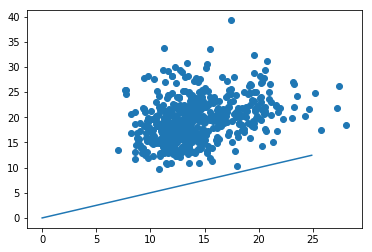

In [122]:
plt.scatter(x=X[:,0], y=X[:,1])
x = np.arange(0, 25, 0.1)
f = lambda x: 0.5*x
plt.plot(x, f(x))

In [82]:
from scipy import optimize

In [135]:
def function_5(points):
    res_obj = optimize.minimize(dist , method='BFGS', x0=1.5, jac=True, options={'eps': 0.001})
    res_obj
    print(res_obj)
    return res_obj.x[0]

def dist(a):
    max_dist=0
    max_point=[-1,-1]
    sq=np.sqrt(a*a+1)
    global X
    for point in X:
        dist=(a*point[0] - point[1])*1./sq
        if(max_dist < dist):
            max_dist=dist
            max_point=point
    print(max_dist, max_point)
    return max_dist

Значение для формы

In [136]:
print(round(function_5(X), 3))

[13.14362115] [28.11 18.47]


IndexError: index 1 is out of bounds for axis 0 with size 1